In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#importing data into dataframe
df_tst=pd.read_csv('test.csv')

df_trn = pd.read_csv('train.csv')
df_trn.head(8)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [2]:
df_tst.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [3]:
df_tst.shape

(418, 11)

In [4]:
df_trn.shape

(891, 12)

In [5]:
Nl_V=df_trn.isna().sum()
Nl_V

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
unq=df_trn.nunique()
unq

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
df_trn.isnull().head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


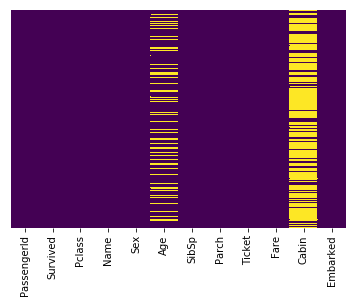

In [8]:
sns.heatmap(df_trn.isnull(),yticklabels=False,cbar=False,cmap='viridis')

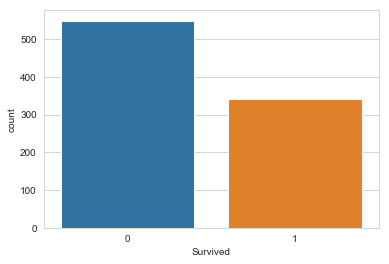

In [9]:
sns.set_style('whitegrid')
sns.countplot('Survived',data=df_trn)

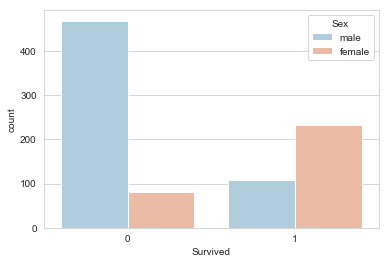

In [10]:
sns.set_style('whitegrid')
sns.countplot('Survived',hue='Sex',data=df_trn,palette='RdBu_r')

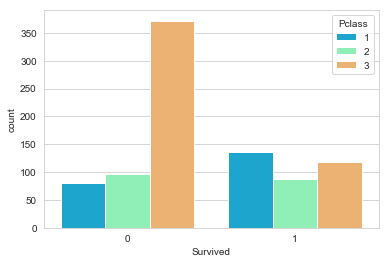

In [11]:
sns.set_style('whitegrid')
sns.countplot('Survived',hue='Pclass',data=df_trn,palette='rainbow')

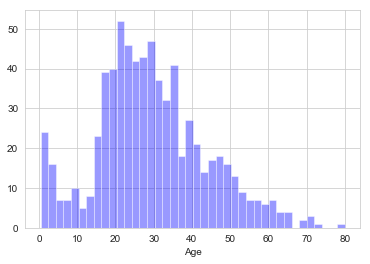

In [12]:
sns.distplot(df_trn['Age'].dropna(),kde=False,color='blue',bins=40)

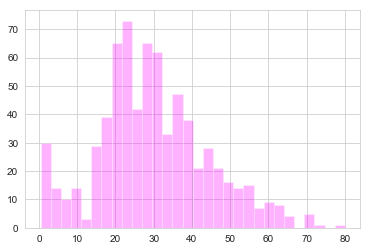

In [13]:
df_trn['Age'].hist(bins=30,color='magenta',alpha=0.3)

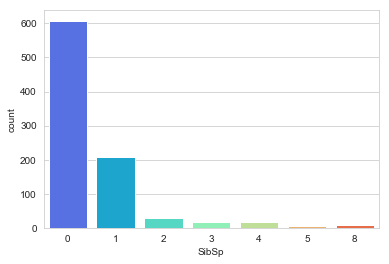

In [14]:
sns.countplot(x='SibSp',data=df_trn,palette='rainbow')

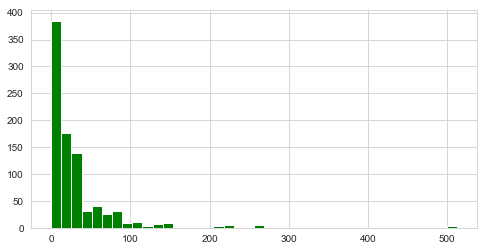

In [15]:
df_trn['Fare'].hist(bins=40,color='green',figsize=(8,4))

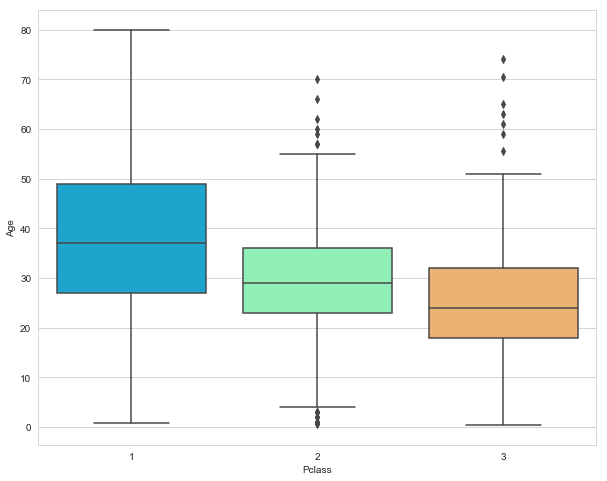

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass',y='Age',data=df_trn,palette='rainbow')

In [17]:
def ag_input(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else :
            return 24
    else:
        return Age

In [18]:
df_trn['Age']=df_trn[['Age','Pclass']].apply(ag_input,axis=1)
df_tst['Age']=df_tst[['Age','Pclass']].apply(ag_input,axis=1)

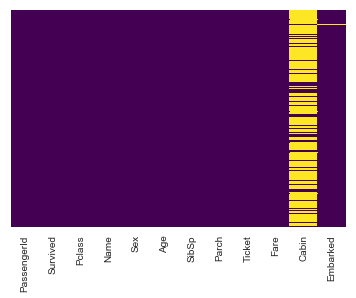

In [19]:
sns.heatmap(df_trn.isnull(),yticklabels=False,cbar=False,cmap='viridis')

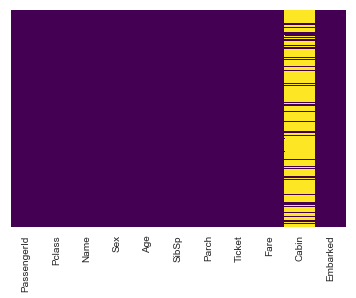

In [20]:
sns.heatmap(df_tst.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
pd.get_dummies(df_tst['Embarked'],drop_first=True).head(3)

,Q,S
0,1,0
1,0,1
2,1,0


In [22]:
pd.get_dummies(df_trn['Embarked'],drop_first=True).head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [23]:
sex=pd.get_dummies(df_trn['Sex'],drop_first=True)
embark=pd.get_dummies(df_trn['Embarked'],drop_first=True)

In [24]:
df_trn.drop(['Sex','Embarked'],axis=1,inplace=True)

In [25]:
trn=pd.concat([df_trn,sex,embark],axis=1)
trnd=trn.copy()
trnd.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [26]:
sex=pd.get_dummies(df_tst['Sex'],drop_first=True)
embark=pd.get_dummies(df_tst['Embarked'],drop_first=True)
df_tst.drop(['Sex','Embarked'],axis=1,inplace=True)
tst=pd.concat([df_tst,sex,embark],axis=1)
tstd=tst.copy()
tstd.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1


In [27]:
trnd['Title']=trnd['Name'].str.extract('([a-zA-Z ]+)\.',expand=False)

tstd['Title']=tst['Name'].str.extract('([a-zA-Z ]+)\.',expand=False)

In [28]:
def replace_titles(x):
    title = x['Title'].strip()
    if title =='Mr'or title =='Capt' or title == 'Col' or title == 'Don'or title == 'Jonkheer'or title == 'Major'or title == 'Rev'or title =='Sir':
          return 'Mr'
    elif title =='Mrs' or title =='the Countess' or title == 'Mme' or title =='Lady':
        return 'Mrs'
    elif title =='Miss' or title == 'Mlle' or title == 'Ms':
        return 'Miss'
    elif title =='Master':
        return 'Master'
    elif title =='Dr':
        if x['male']==1:
            return 'Mr'
        else:
            return 'Mrs'
        
trnd['Title'] = trnd.apply(replace_titles, axis=1)
tstd['Title'] = tstd.apply(replace_titles, axis=1)


In [29]:
trnd.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,Mr


In [30]:

tstd.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S,Title
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0,Mr
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,Mrs


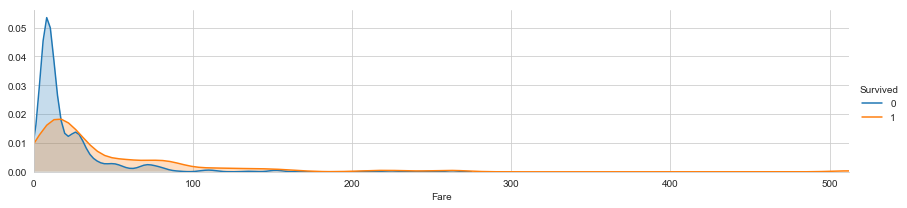

In [31]:
fg = sns.FacetGrid(trnd,hue='Survived',aspect=4)
fg.map(sns.kdeplot,'Fare',shade=True)
fg.set(xlim=(0,trnd['Fare'].max()))
fg.add_legend()
plt.show()

(0, 30)

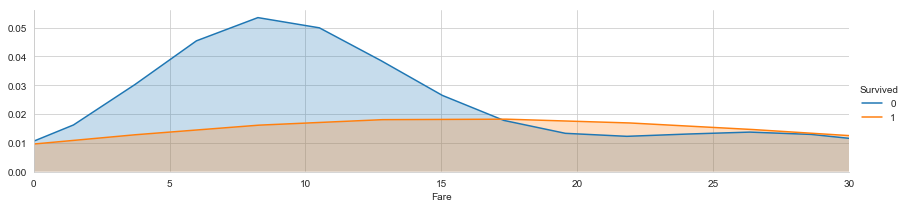

In [32]:
fg = sns.FacetGrid(trnd,hue='Survived',aspect=4)
fg.map(sns.kdeplot,'Fare',shade=True)
fg.set(xlim=(0,trnd['Fare'].max()))
fg.add_legend()
plt.xlim(0,30)

In [33]:
title=pd.get_dummies(trnd['Title'],drop_first=True)
trnd.drop(['Name','Title','Ticket'],axis=1,inplace=True)
trnd=pd.concat([trnd,title],axis=1)
traind=trnd.copy()
traind.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1,0,1,0
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1,1,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1,0,1,0


In [34]:
title=pd.get_dummies(tstd['Title'],drop_first=True)
tstd.drop(['Name','Title','Ticket'],axis=1,inplace=True)
tstd=pd.concat([tstd,title],axis=1)
testd=tstd.copy()
testd.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,NaN,1,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,NaN,0,0,1,0,0,1
2,894,2,62.0,0,0,9.6875,NaN,1,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,NaN,1,0,1,0,1,0
4,896,3,22.0,1,1,12.2875,NaN,0,0,1,0,0,1


In [35]:
traind['Family_size']=traind['SibSp']+traind['Parch']+1
traind['Family_size']=traind['Family_size']/10
traind.drop(['SibSp','Parch'],axis=1,inplace=True)

In [36]:
traind.head()

,PassengerId,Survived,Pclass,Age,Fare,Cabin,male,Q,S,Miss,Mr,Mrs,Family_size
0,1,0,3,22.0,7.2500,NaN,1,0,1,0,1,0,0.2
1,2,1,1,38.0,71.2833,C85,0,0,0,0,0,1,0.2
2,3,1,3,26.0,7.9250,NaN,0,0,1,1,0,0,0.1
3,4,1,1,35.0,53.1000,C123,0,0,1,0,0,1,0.2
4,5,0,3,35.0,8.0500,NaN,1,0,1,0,1,0,0.1


In [37]:
testd['Family_size']=testd['SibSp']+testd['Parch']+1
testd['Family_size']=testd['Family_size']/10
testd.drop(['SibSp','Parch'],axis=1,inplace=True)

In [38]:
traind['Family_size'].max()

1.1

In [39]:
def replace_age(x):
    age = x['Age']
    if age<=4.0:
        return 0.1
    elif age<=8.0:
        return 0.2
    elif age<=16.0:
        return 0.4
    elif age<=24.0:
        return 0.6
    elif age<=30.0:
        return 0.8
    elif age<=40.0:
        return 1.0
    elif age<=50.0:
        return 1.2
    else:
        return 1.5

In [40]:
traind['Age'] = traind.apply(replace_age, axis=1)

In [41]:
traind['Cabin'].value_counts().head()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
C22 C26        3
Name: Cabin, dtype: int64

In [42]:
traind.head()

,PassengerId,Survived,Pclass,Age,Fare,Cabin,male,Q,S,Miss,Mr,Mrs,Family_size
0,1,0,3,0.6,7.2500,NaN,1,0,1,0,1,0,0.2
1,2,1,1,1.0,71.2833,C85,0,0,0,0,0,1,0.2
2,3,1,3,0.8,7.9250,NaN,0,0,1,1,0,0,0.1
3,4,1,1,1.0,53.1000,C123,0,0,1,0,0,1,0.2
4,5,0,3,1.0,8.0500,NaN,1,0,1,0,1,0,0.1


In [43]:
testd['Age'] = testd.apply(replace_age, axis=1)

In [44]:
testd.head()

,PassengerId,Pclass,Age,Fare,Cabin,male,Q,S,Miss,Mr,Mrs,Family_size
0,892,3,1.0,7.8292,NaN,1,1,0,0,1,0,0.1
1,893,3,1.2,7.0000,NaN,0,0,1,0,0,1,0.2
2,894,2,1.5,9.6875,NaN,1,1,0,0,1,0,0.1
3,895,3,0.8,8.6625,NaN,1,0,1,0,1,0,0.1
4,896,3,0.6,12.2875,NaN,0,0,1,0,0,1,0.3


In [45]:
def replace_fare(x):
    fare = x['Fare']
    if fare<=25.0:
        return 0.1
    elif fare<=50.0:
        return 0.2
    elif fare<=75.0:
        return 0.3
    elif fare<=100.0:
        return 0.4
    elif fare<=125.0:
        return 0.5
    elif fare<=150.0:
        return 0.6
    elif fare<=175.0:
        return 0.7
    elif fare<=200.0:
        return 0.8
    else:
        return 1

In [46]:
traind['Fare'] = traind.apply(replace_fare, axis=1)

In [47]:
testd['Fare'] = testd.apply(replace_fare, axis=1)

In [48]:
traind['CabinF'] = traind['Cabin'].str[:1]
traind.head()

,PassengerId,Survived,Pclass,Age,Fare,Cabin,male,Q,S,Miss,Mr,Mrs,Family_size,CabinF
0,1,0,3,0.6,0.1,NaN,1,0,1,0,1,0,0.2,NaN
1,2,1,1,1.0,0.3,C85,0,0,0,0,0,1,0.2,C
2,3,1,3,0.8,0.1,NaN,0,0,1,1,0,0,0.1,NaN
3,4,1,1,1.0,0.3,C123,0,0,1,0,0,1,0.2,C
4,5,0,3,1.0,0.1,NaN,1,0,1,0,1,0,0.1,NaN


In [49]:
traind['CabinF'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinF, dtype: int64

In [50]:
def replace_cabin(x):
    cabin = x['CabinF']
    if cabin=='A':
        return 1
    elif cabin=='B':
        return 2
    elif cabin=='C':
        return 3
    elif cabin=='D':
        return 4
    elif cabin=='E':
        return 5
    elif cabin=='F':
        return 6
    elif cabin=='G':
        return 7
    elif cabin=='T':
        return 8
    else:
        return 0

In [51]:
traind['CabinF'] = traind.apply(replace_cabin, axis=1)
traind.drop(['Cabin'],axis=1,inplace=True)
traind['CabinF'] =traind['CabinF'] /10
traind.head()

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S,Miss,Mr,Mrs,Family_size,CabinF
0,1,0,3,0.6,0.1,1,0,1,0,1,0,0.2,0.0
1,2,1,1,1.0,0.3,0,0,0,0,0,1,0.2,0.3
2,3,1,3,0.8,0.1,0,0,1,1,0,0,0.1,0.0
3,4,1,1,1.0,0.3,0,0,1,0,0,1,0.2,0.3
4,5,0,3,1.0,0.1,1,0,1,0,1,0,0.1,0.0


In [52]:
testd['CabinF'] = testd['Cabin'].str[:1]
testd['CabinF'] = testd.apply(replace_cabin, axis=1)
testd['CabinF'] =testd['CabinF'] /10
testd.drop(['Cabin'],axis=1,inplace=True)

In [53]:
testd.head()

,PassengerId,Pclass,Age,Fare,male,Q,S,Miss,Mr,Mrs,Family_size,CabinF
0,892,3,1.0,0.1,1,1,0,0,1,0,0.1,0.0
1,893,3,1.2,0.1,0,0,1,0,0,1,0.2,0.0
2,894,2,1.5,0.1,1,1,0,0,1,0,0.1,0.0
3,895,3,0.8,0.1,1,0,1,0,1,0,0.1,0.0
4,896,3,0.6,0.1,0,0,1,0,0,1,0.3,0.0


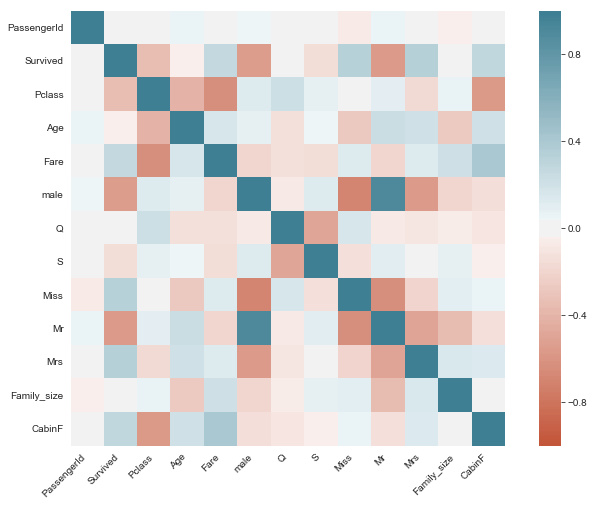

In [54]:
plt.rcParams["figure.figsize"] = [12,8]
corr = traind.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');


In [55]:
train_d=traind.copy()
train_d=train_d.drop(['PassengerId'],axis=1)
traindt=train_d.drop(['Survived'],axis=1)
target=train_d['Survived']
traindt.shape,target.shape

((891, 11), (891,))

In [56]:
import sklearn as sl
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
 

In [57]:
from sklearn.model_selection import KFold


In [58]:
k_fold= KFold(n_splits=10,shuffle=True,random_state=0)

In [59]:
## kNN


In [60]:
clf=KNeighborsClassifier(n_neighbors=13)
scoring ='accuracy'
score=cross_val_score(clf,traindt,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.82222222 0.79775281 0.7752809  0.78651685 0.83146067 0.80898876
 0.80898876 0.79775281 0.79775281 0.78651685]


In [61]:
round(np.mean(score)*100,2)

80.13

In [62]:
## Decisiontree

In [63]:
clf=DecisionTreeClassifier()
scoring ='accuracy'
score=cross_val_score(clf,traindt,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.77777778 0.82022472 0.78651685 0.76404494 0.86516854 0.78651685
 0.7752809  0.79775281 0.78651685 0.7752809 ]


In [64]:
round(np.mean(score)*100,2)

79.35

In [65]:
## Randomforest

In [66]:
clf= RandomForestClassifier()
scoring ='accuracy'
score=cross_val_score(clf,traindt,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.8        0.84269663 0.78651685 0.79775281 0.85393258 0.7752809
 0.80898876 0.79775281 0.7752809  0.76404494]


In [67]:
round(np.mean(score)*100,2)

80.02

In [68]:
##Naive Bayes

In [69]:
clf= GaussianNB()
scoring ='accuracy'
score=cross_val_score(clf,traindt,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.78888889 0.7752809  0.7752809  0.73033708 0.75280899 0.76404494
 0.79775281 0.85393258 0.79775281 0.83146067]


In [70]:
round(np.mean(score)*100,2)

78.68

In [71]:
##SVM

In [72]:
clf=SVC()
scoring ='accuracy'
score=cross_val_score(clf,traindt,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.83333333 0.80898876 0.79775281 0.79775281 0.84269663 0.80898876
 0.83146067 0.84269663 0.83146067 0.85393258]


In [73]:
round(np.mean(score)*100,2)

82.49

In [74]:
clf=SVC()
clf.fit(traindt,target)
testdt=testd.drop(['PassengerId'],axis=1).copy()
prediction=clf.predict(testdt)

In [75]:
submission=pd.DataFrame({'PassengerId':testd['PassengerId'],'Survived':prediction})

submission.to_csv('Titanic_prediction.csv',index=False)
submission=pd.read_csv('Titanic_prediction.csv')
submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
